# BENoiT: Better English Noisy Audio Transcriptions
 Track: Applications | Sub-track: Text + Audio 
Project mentor: Xuan Zhang

Pulkit Madaan <pmadaan2@jh.edu>, Vijay Murari Tiyyala <vtiyyal1@jh.edu>, Ehong sun <esun7@jh.edu>, Carolyne Holmes <cholme26@jh.edu>

https://github.com/madaanpulkit/benoit

# Outline and Deliverables

List the deliverables from your project proposal. For each uncompleted deliverable, please include a sentence or two on why you weren't able to complete it (e.g. "decided to use an existing implementation instead" or "ran out of time"). For each completed deliverable, indicate which section of this notebook covers what you did.

If you spent substantial time on any aspects that weren't deliverables in your proposal, please list those under "Additional Work" and indicate where in the notebook you discuss them.

### Uncompleted Deliverables
1. Would Like to accomplish
 - Compare performance after replacing back translation with human-crafted rules for adding noise to text in data generation.
 - Comparing performance after replacing the Transcription Model with a different TorchAudio ASR model.
 - Improvement in Language Model Score by the Denoising Model.
2. Expect to complete
 - Discovering failure modes (what patterns do the data follow, where the model fails)

The model converged to a degenerate solution, so further comparisons and analysis couldn't be done.

### Completed Deliverables
1. Must complete
 - A corpus of synthetically generated noisy speech audio with grammatically correct English sentences [in "Dataset" below](#scrollTo=zFq-_D0khnhh).
 - Working implementation of the Denoising Model [[GitHub Repo](https://github.com/madaanpulkit/benoit)].
 - We have a function capable of taking raw audio and returning faithful and corrected text
2. Expect to complete
 - Analysed the source of error, that degrades model performance
 - Generated noisy data via human-crafted rules (random word deletion, word order permutation, etc.)

# Preliminaries

## What problem were you trying to solve or understand?


Transcribing audio is a difficult task, and it becomes even harder when the audio is noisy in the way that the speaker's first language is not English. Most approaches to transcription focus on being faithful to the original audio, but our aim is to learn grammatical auto-correction to produce grammatically correct transcriptions.

**What are the real-world implications of this data and task?**

Automatic speech recognition (ASR) approaches are typically faithful to the original audio and work well when the content is of high quality. However, audio content is often not of high quality for reasons such as the presence of physical noise such as static, the cutting out of words due to poor audio connection, and speakers with thick accents or poor English proficiency since many users of technology don't have English as their first language. All of these factors can impact a listener's ability to understand the audio content; and for those who are hard of hearing or deaf, they have difficulty as the ASR may not be able to correctly transcribe the audio. In many situations, this inability to understand the audio could be seriously detrimental, such as if a user was couldn't understand what is being said in class and fails their class due to it. As such, just as auto-correct functions for typing have made it easier for people who are not professionally fluent in English to communicate without constantly looking up the correct spelling of words, our goal with BENoiT is to improve audio communication through the use of auto-corrected, grammatically correct transcriptions that will help all users fully understand the audio content.

**How is this problem similar to others we’ve seen in lectures, breakouts, and homeworks?**

We use deep learning to tackle this problem. We model it as a supervised classification task, where the input is a speech audio signal that is temporal in nature. For each time step, the model then classifies the audio as belonging to a particular word from the vocabulary.

The lectures introduced the denoising autoencoder paradigm as a way to denoise images, we use it for text and model this problem. The lectures and homework also covered the use of seq2seq models with and without attention for transforming text to text. Hence we combine these 2 paradigms to denoise text into grammatically correct text.

**What makes this problem unique?**

Most automatic speech recognition (ASR) approaches do not focus on producing grammatically correct output. Instead, they use language models to inform the model better about the legibility of the transcription. In contrast, our approach explicitly transforms ASR outputs into grammatically correct sentences.

**What ethical implications does this problem have?**

The major ethical concern of our model is the use of voices during training. When generating audio files for the training data, the voices were selected from either an artifical middle-aged American male or female voice. This introduces bias as we do not train on accented voices or voices that have varied tones (such as the voices of children of the elderly) and our model may not be able to predict upon them as well. In this case, our model could be discriminatory against people with voices we did not train upon since they couldn't be understood as well. Additionally, though we used Artificial voices for this training, it is possible that other voices could be used. In the case of real-life people's voices being used, we would have to consider consent and if we are ethically allowed to use the voices of people who cannot consent, such as the dead. Overall, there are also ethical concerns if our model is inaccurate. If it mis-transcribes the audio, it could cause misunderstandings and disproportionately affect those who need transcriptions more (as with the previous example, if a deaf person relies on our model to learn their recorded class material and our model is inaccurate, their class grade and mental wellbeing could be harmed).

## Dataset(s)

**Describe the dataset(s) you used.**

We used the dataset [Reuters-21578, Distribution 1.0](https://archive.ics.uci.edu/ml/datasets/Reuters-21578+Text+Categorization+Collection), this contains the news articles in 21 files which along with html/xml tags and metadata.

**How were they collected?**

From the data source [[LINK](https://archive.ics.uci.edu/ml/datasets/Reuters-21578+Text+Categorization+Collection)] :
> The documents in the Reuters-21578 collection appeared on the Reuters newswire in 1987. The documents were assembled and indexed with categories by personnel from Reuters Ltd. (Sam Dobbins, Mike Topliss, Steve Weinstein) and Carnegie Group, Inc. (Peggy Andersen, Monica Cellio, Phil Hayes, Laura Knecht, Irene Nirenburg) in 1987.

> In 1990, the documents were made available by Reuters and CGI for research purposes to the Information Retrieval Laboratory (W. Bruce Croft, Director) of the Computer and Information Science Department at the University of Massachusetts at Amherst. Formatting of the documents and production of associated data files was done in 1990 by David D. Lewis and Stephen Harding at the Information Retrieval Laboratory.

We only use 3 of these files and clean the metadata and tags and convert the files to one sentence per line. We use this as the true label (grammatically correct sentences). <br>
To create the input data, we synthesise it. We did backtranslation on the correct sentences by translating them from English → Telugu → English. <br>
Next, we used a TTS model on these back-translated sentences to generate randomly selected Windows American male and female voice audio samples for each of those sentences. Overall, 49.95% or the files were male and 50.05 % were female.

**Why did you choose them?**

Since, the data in Reuters-21578, Distribution 1.0 comes from news articles we can be highly certain that the sentences are grammatically correct. And therefore we can use them as the true labels and generate the noisy audio as pseudo-input via our generation method. <br>
We selected this dataset as it was in our desired target language of English and included a large number of samples (95,368 sentences over the 21 files). These files also included more obsure or technical words (such as 'treasury', 'manufacturing', 'joint venture', and 'Beryllium') that would be useful to make sure our model trained on, rather than common and easily transcribed words. For the text backtranslation, the Telugu language was selected for since it has complex grammar rules that often do not translate correctly with automatic translators like the package `googletrans` that we used, thereby introducing poor-translation grammatical noise. The use of both male and female voices was done to try to reduce bias by increasing the variance of voice type, thouh not all biased was removed as this is still a limited voice sample.

**How many examples in each?**

- number of files: *3*                
- sentences/audios: *95,368*
- every word/piece becomes a vector of *16* after embedding
- train 
 - files: *{1.txt}*
 - sentences/audios: *4,974*
- val 
 - files: *{11.txt}*
 - val sentences/audios: *4,689*
- test 
 - files: *{12.txt}*
 - sentences/audios: *4,571*


In [ ]:
import torchaudio
import IPython.display as ipd

In [ ]:
# Load your data and print 2-3 examples
n = 2

y = []
with open("sample_true.txt") as f:
    y = f.read().splitlines()
y = y[:n]

t = []
with open("sample_noisy.txt") as f:
    t = f.read().splitlines()
t = t[:n]

X = [f"sample-{i+1}.mp3" for i in range(n)]

In [ ]:
for i in range(n):
    ipd.display_markdown(f"Sample {i+1}:", raw=True)
    ipd.display_markdown(f"- INPUT", raw=True)
    ipd.display(ipd.Audio(X[i]))
    ipd.display_markdown(f"- LABELs: {y[i]}", raw=True)
    ipd.display_markdown(f"- INTER: {t[i]}", raw=True)

Sample 1:

- INPUT

- LABELs: Showers continued throughout the week in the Bahia cocoa zone, alleviating the drought since early January and improving prospects for the coming temporao, although normal humidity levels have not been restored, Comissaria Smith said in its weekly review.

- INTER: Showers continued throughout the week in the Bahia Cocoa zone, easing the drought from early January and improving prospects for the upcoming temporão, although normal moisture levels have not been restored, Comissaria Smith said in its weekly review.

Sample 2:

- INPUT

- LABELs: The dry period means the temporao will be late this year.

- INTER: The dry season means Tempora will be delayed this year.

## Pre-processing

Since, the first stage of the model is a pre-trained ASR Model that takes in raw audio we don't preprocess the audio. Since, the model is not end-to-end the output of the ASR is preprocessed for the second stage denoising model. Going forward we talk about only this intermediate text data.

**What features did you use or choose not to use? Why?**

Every word is transformed into a categorical label and then passed through an embedding layer to make every word into a *16* length vector.

**If you have categorical labels, were your datasets class-balanced?**

Every word was transformed into a categorical label. As in any seq2seq text task the words are not balanced as their distribution gives insights into the likelihood of the word occuring.

**How did you deal with missing data? What about outliers?**

We didn't have missing data. But every sequence's length is limited to 256 to limit to mamage outliers.

**What approach(es) did you use to pre-process your data? Why?**

We use the `T5Transform` from `torchtext`.
Transform:
- Input 
 - list of sentences
- Method
 - byte-pair ecodes with google's sentence piece model into categories (where categories are words in vocabulary)
 - clips the sentence length at 256 
 - pads all the sentences, into a batch tensor
- Output
 - transformed tensor

**Are your features continuous or categorical? How do you treat these features differently?**

All the features are categorical, and use ordinal encoding to convert into indexes which are then passed through an embedding layer to make a dense representation for every word.

In [ ]:
!pip install -U torchdata torchtext torchaudio torchvision torchmetrics matplotlib

In [ ]:
from torchtext.prototype.models import T5Transform
transform = T5Transform(
    sp_model_path="https://download.pytorch.org/models/text/t5_tokenizer_base.model",
    max_seq_len=256,
    eos_idx=1,
    padding_idx=0,
) 

100%|██████████| 792k/792k [00:00<00:00, 23.0MB/s]


In [ ]:
# For those same examples above, what do they look like after being pre-processed?
print("Intermediate ASR output:\n", t[0])
print("Transformed:\n", transform(t[0]))

Intermediate ASR output:
 Showers continued throughout the week in the Bahia Cocoa zone, easing the drought from early January and improving prospects for the upcoming temporão, although normal moisture levels have not been restored, Comissaria Smith said in its weekly review.
Transformed:
 tensor([17537,     7,  2925,  1019,     8,   471,    16,     8,  2659,   107,
           23,     9, 20014,     9,  2901,     6,     3, 16927,     8, 19611,
           45,   778,  1762,    11,  4863, 11136,    21,     8,     3,  4685,
        10301,   127,     2,    32,     6,  2199,  1389,  9576,  1425,    43,
           59,   118, 13216,     6,   638, 11502,  6286,  3931,   243,    16,
          165,  5547,  1132,     5,     1])


In [ ]:
import numpy as np

In [ ]:
# Visualize the distribution of your data before and after pre-processing.
#   You may borrow from how we visualized data in the Lab homeworks.
train_words = []
with open("train.txt") as f:
    for line in f.read().splitlines():
        train_words.append(len(line.split(" ")))
train_words = np.array(train_words)

val_words = []
with open("val.txt") as f:
    for line in f.read().splitlines():
        val_words.append(len(line.split(" ")))
val_words = np.array(val_words)

test_words = []
with open("test.txt") as f:
    for line in f.read().splitlines():
        test_words.append(len(line.split(" ")))
test_words = np.array(test_words)


In [ ]:
import matplotlib.pyplot as plt

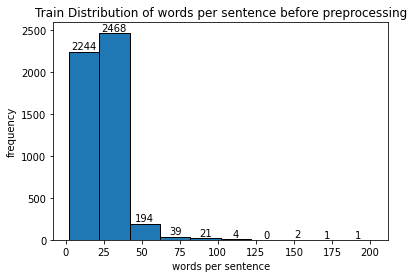

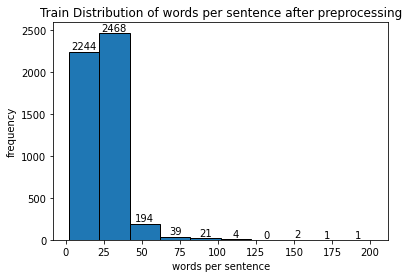

In [ ]:
values, bins, bars = plt.hist(train_words, edgecolor="black")
plt.title("Train Distribution of words per sentence before preprocessing")
plt.xlabel("words per sentence")
plt.ylabel("frequency")
plt.bar_label(bars)
plt.show()

values, bins, bars = plt.hist(train_words[train_words<=256], edgecolor="black")
plt.title("Train Distribution of words per sentence after preprocessing")
plt.xlabel("words per sentence")
plt.ylabel("frequency")
plt.bar_label(bars)
plt.show()

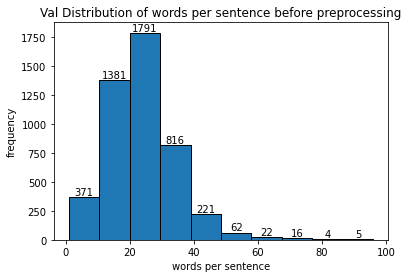

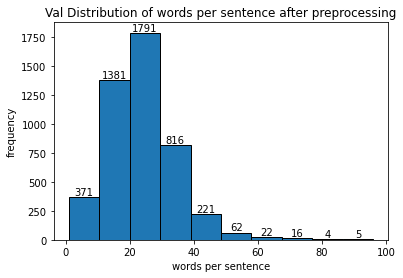

In [ ]:
values, bins, bars = plt.hist(val_words, edgecolor="black")
plt.title("Val Distribution of words per sentence before preprocessing")
plt.xlabel("words per sentence")
plt.ylabel("frequency")
plt.bar_label(bars)
plt.show()

values, bins, bars = plt.hist(val_words[val_words<=256], edgecolor="black")
plt.title("Val Distribution of words per sentence after preprocessing")
plt.xlabel("words per sentence")
plt.ylabel("frequency")
plt.bar_label(bars)
plt.show()

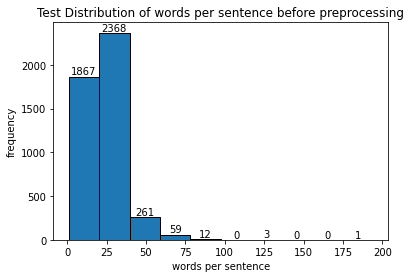

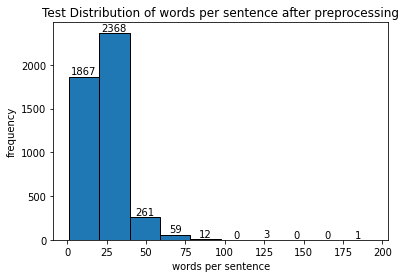

In [ ]:
values, bins, bars = plt.hist(test_words, edgecolor="black")
plt.title("Test Distribution of words per sentence before preprocessing")
plt.xlabel("words per sentence")
plt.ylabel("frequency")
plt.bar_label(bars)
plt.show()

values, bins, bars = plt.hist(test_words[test_words<=256], edgecolor="black")
plt.title("Test Distribution of words per sentence after preprocessing")
plt.xlabel("words per sentence")
plt.ylabel("frequency")
plt.bar_label(bars)
plt.show()

# Models and Evaluation

## Experimental Setup

**How did you evaluate your methods? Why is that a reasonable evaluation metric for the task?**

We used WordErrorRate as our metric. This is the standard metric used in ASR research.

**What did you use for your loss function to train your models? Did you try multiple loss functions? Why or why not?**

We used cross entropy loss as our loss function, as we do word classification at every timestep. We tried this single loss function as it is the standard loss function for classification in text-to-text seq2seq tasks.

**How did you split your data into train and test sets? Why?**

We randomly chose one file each for train, val and test out the `21` files. A single file is also a big dataset to train on for the compute accessibility we had. So one file per split, keeps them disjoint, and gives a good number of samples in all the splits.

We used cross entropy loss as our loss function and Adam optimizer. The code is available in the [Github repo](https://github.com/madaanpulkit/benoit). 


## Baselines 

**What baselines did you compare against? Why are these reasonable?**

Our baseline was Pre-trained Wav2vec2 ASR model from torchaudio.
We then add our denoising paradigm on top of it. This is reasonable as we are trying to improve ASR models, hence the baseline performance is ASR performance.

**Did you look at related work to contextualize how others methods or baselines have performed on this dataset/task? If so, how did those methods do?**

There is no work in our knowledge that does grammatically correct transciption explicitly. So, we looked at ASR models, and decided to use the ASR model as the baseline as that is the model we build on and want to improve. One of the better ASR models is Wav2Vec 2.0 that we use as the baseline, and it performs with 1.52 WER as the noisy dataset we introduce is not that noisy, it has an inherent WER of 1.23.

We looked at three other ASR models. First was OpenAI’s Whisper. It uses an encoder-decoder transformer model. The encoder is made of 2 convolution layers with filter widths of 3 and a GELU activation function. The decoder uses position embeddings and tied input-output token representations. The encoder and decoder have the same width and number of transformer blocks. This model saw much better performance over existing ASR models on multiple foreign languages to English datasets. But due to the nature of its data, the model would insert words into English translations originally not in foreign text (hypothesized to be the result of the model making its own predictions). Also performance wasn’t consistent across languages due to lack of data for some languages and there would be repetitive text due to sequential architecture of the model.

The other two models we looked at were Jasper and QuartzNet, which were built under Nvidia NeMo (Nividia’s AI platform). Jasper is a deep neural network made of 1-D convolution layers with each sub-block made of 1-D convolution, batch normalization, ReLU, and dropout. QuartzNet followed much of Jasper’s architecture except it used separable convolution. Thus its sub-blocks were the same except they had 1-D separable convolution. Jasper has SOTA (State of the Art) performance on test-clean subsets and on end-end speech recognition for test-other (read speech). QuartzNet achieved similar results on other end-end systems despite being significantly smaller. But Jasper still needs to be tested on larger, deeper datasets and QuartzNet has to learn how to deal with data from various sources and when training data extremely outnumbers target data.

## Methods

**What methods did you choose? Why did you choose them?**

Our model is a 2-stage pipeline. <br>
The first is a pre-trained torchaudio ASR model Wav2Vec 2.0, this takes in raw audio and outputs faithful transcriptions. <br>
The second stage is our denoising seq2seq GRU autoencoder implemented from scratch with the help of torch tutorials and github repositories, this takes in faithful text as input and outputs grammatically correct text.

We chose this particular ASR model because its readily available, widely used in literature, and a lot of tutorials available. It Works directly with raw audios - eliminating the need for non-trivial audio preprocessing. <br>
We chose this denoising model because seq2seq is a Standard practice in literature and GRUs are able to capture long range dependencies.

**How did you train these methods, and how did you evaluate them? Why?**

The ASR model is not trained only Denoising is trained. <br>
Training runs 100 epochs with Adam Optimizer evaluated on Word Error Rate. We chose Word Error Rate as it's the standard metric used in ASR tasks. It cacluclates the number of insertions, substitutions, deletions b/w ground trutch and prediction as a fraction of the number of words in the sentence.

**Which methods were easy/difficult to implement and train? Why?**

The denoising model has been hard to train and implement

- Challenge to adapt to our task
 - Shapes are challenge in sequence tasks 
 - Batch first is intuitive, sequence first is not
 - Temporal aspect makes scripting sequential
- The models learn the degenerate solution of only predicting `<pad>` at every step.
 - The model is initially padded with `<pad>` at pre-processing
 - Random batch sampling leads to majority of the sequence being just `<pad>`

**For each method, what hyperparameters did you evaluate? How sensitive was your model's performance to different hyperparameter settings?**

- Batch_size: 32
- Initial Learning Rate: 0.0001
- Adam beta_1: 0.9
- Adam beta_2: 0.999
- epochs: 100

The model's performance was not very sensitive to minute changed in the learning rate. Experimenting with batch size improved training speed, but didn't effect model performance.

The code is available in the [Github repo](https://github.com/madaanpulkit/benoit). 

*X-axis*: iterations <br>
*Y-axis*: loss

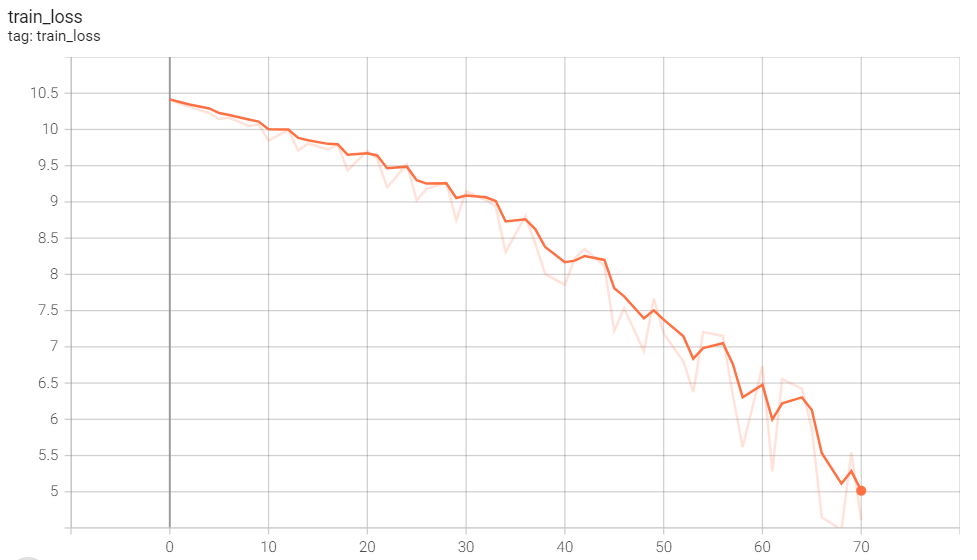

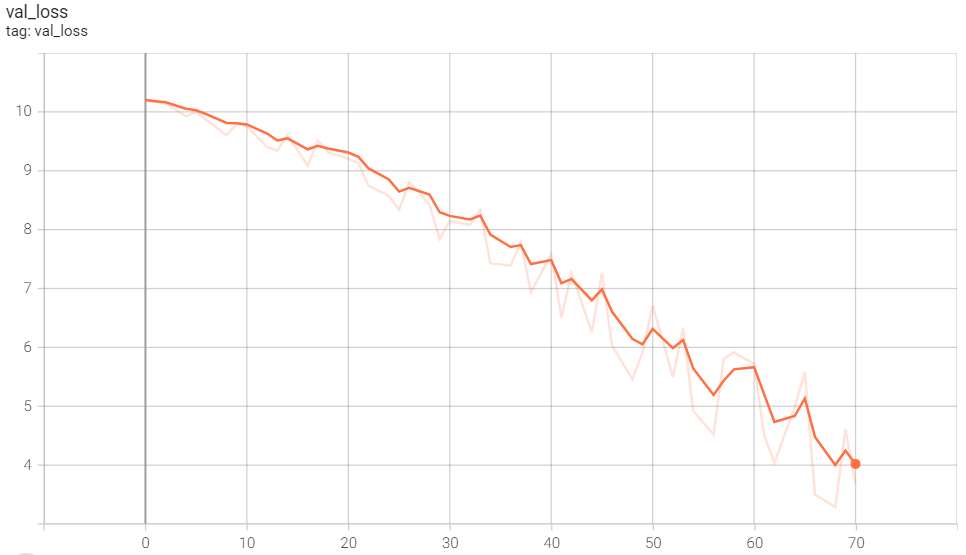

In [ ]:
ipd.display(ipd.Image("train_loss.png"))
ipd.display(ipd.Image("val_loss.png"))

## Results

**Show tables comparing your methods to the baselines.**

| Model | WER |
|-------|-----|
|Inherent| 1.23 |
|Baseline| 1.52 |
|BENoiT| 1.0 |

**What about these results surprised you? Why?**

Eventhough the model has clearly leant the degenerate solution of producing only `<pad>` token, the WER metric is the lower than Baseline when it clearly doesn't perform that well. <br>
- As the epochs progressed the model started predicting shorter and shorter sentences. 
- More `<pad>` tokens
- Performance as seen from sample transcriptions started declining as the epochs progressed
- But the loss decreased
- Model found a loophole: predicting `<pad>` reduces loss on everage
- Converged to a local minima


**Did your models over- or under-fit? How can you tell? What did you do to address these issues?**

The model is wrongly fitted, the loss is descreasing for both train and val as epochs progress. We tried increasing the epochs but to no avail, it exacerbates the problem (from random to specifically bad).

**What does the evaluation of your trained models tell you about your data? How do you expect these models might behave differently on different data?**

The evaluation tells us that performance metrics are also prone to degenerate solutions, WER should ideally give a bad performance but is a simple metric and doesn't take into account short sentences inflate performance. The model should ideally be able to learn reconstruction as has been shown in literature. The approach has potential, given some more time and effort could possibly improve transcription.


*X-axis*: iterations <br>
*Y-axis*: loss

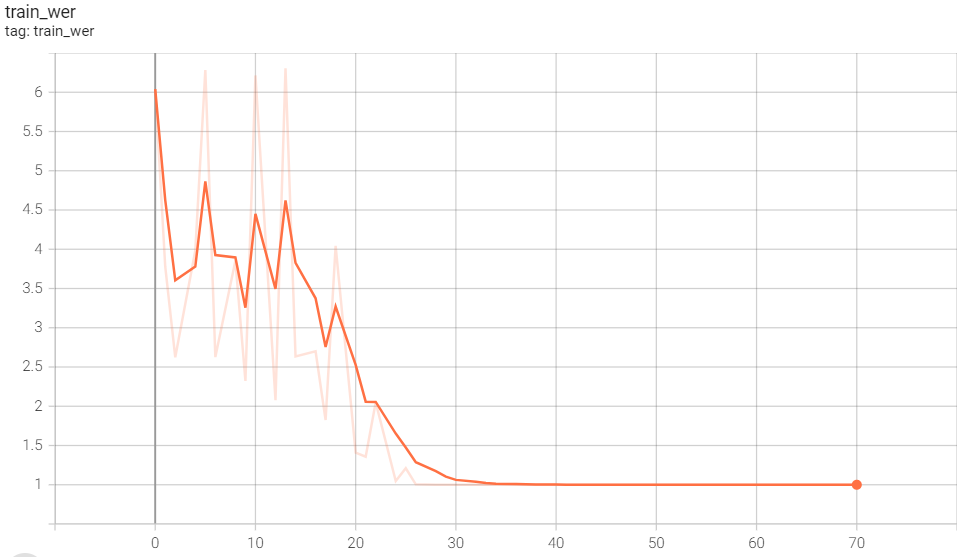

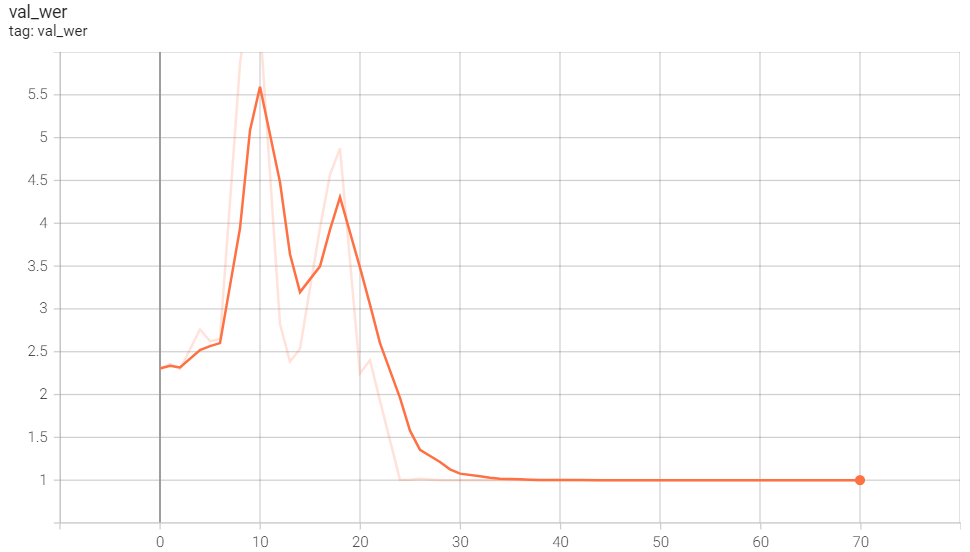

In [ ]:
ipd.display(ipd.Image("train_wer.png"))
ipd.display(ipd.Image("val_wer.png"))

# Discussion

## What you've learned

**What concepts from lecture/breakout were most relevant to your project? How so?**

Denoising AutoEncoder, Seq2Seq and under/over-fitting detection from the lectures were the most relevant.

**What aspects of your project did you find most surprising?**

- Laying down an approach to solve the task doesn't trivially translate to being able to solve the task.
- Deep learning language tasks are notoriously hard to train and easy to misspecify.
- An engineering choice of padding the sentences might have lead to degenerate solution.
- Every step of decision involves being aware of the ethical implications. 

**What lessons did you take from this project that you want to remember for the next ML project you work on? Do you think those lessons would transfer to other datasets and/or models? Why or why not?**

- Start putting ideas to code early in the process helps realising what works what decisions need to be made
- Start with fine-tuning pre-trained models cascaded in a pipeline for proof-of-concept
- Spend more time on data generation / curation


**What was the most helpful feedback you received during your presentation? Why?**

Unfortunately, due to going last and other groups running over the time limit, our group was cut off from presenting fully and it seems that this limited the other group's abiltiy to provide us with feedback (since they missed some of our explanations). However, Xuan's feedback was helpful as was the general feedback we got from other groups about needing to explain why we make certain choices more thoroughly and use more visualization. The most helpful feedback was to work on analysis of the model rather than focusing on improving it. 

**If you had two more weeks to work on this project, what would you do next? Why?**

The first thing we would do is to not do padding by not batching, and see if that helps improve learning. And do an ablative analysis on the different components of our pipeline.<br>
Additionally, we would take the time to work more with our data before training. Specifically, we could use the time to incorporate our method of adding noise that performs random permutations and deletion to the text before doing TTS (the code for which is in the GitHub repository) and to allow for more voices in the audio to reduce bias. In general, we would use the extra time to get a more detailed look at each step of our process, looking at exactly what happens and creating more charts to help us gain a deeper understanding.



# References

- [https://huggingface.co/nvidia/stt_en_conformer_transducer_xlarge](https://huggingface.co/nvidia/stt_en_conformer_transducer_xlarge)
- [https://huggingface.co/nvidia/stt_en_conformer_transducer_xlarge#model-architecture](https://huggingface.co/nvidia/stt_en_conformer_transducer_xlarge#model-architecture)
- [https://docs.nvidia.com/deeplearning/nemo/user-guide/docs/en/main/asr/models.html#quartznet](https://docs.nvidia.com/deeplearning/nemo/user-guide/docs/en/main/asr/models.html#quartznet)
- [https://docs.nvidia.com/deeplearning/nemo/user-guide/docs/en/main/asr/models.html#jasper](https://docs.nvidia.com/deeplearning/nemo/user-guide/docs/en/main/asr/models.html#jasper)
- [https://arxiv.org/pdf/1904.03288v3.pdf](https://arxiv.org/pdf/1904.03288v3.pdf)
- [https://www.semanticscholar.org/reader/a0070675b4a7f55777cc1fceb5463c368e236337](https://www.semanticscholar.org/reader/a0070675b4a7f55777cc1fceb5463c368e236337)
- [https://archive.ics.uci.edu/ml/datasets/Reuters-21578+Text+Categorization+Collection](https://archive.ics.uci.edu/ml/datasets/Reuters-21578+Text+Categorization+Collection)
- [https://pytorch.org/](https://pytorch.org/)
- [https://pytorch.org/text/stable/index.html](https://pytorch.org/text/stable/index.html)
- [https://github.com/ssut/py-googletrans](https://github.com/ssut/py-googletrans)
- [https://github.com/quodlibet/mutagen](https://github.com/quodlibet/mutagen)
- [https://github.com/ananyahjha93/cycle-consistent-vae](https://github.com/ananyahjha93/cycle-consistent-vae)
- [https://github.com/madaanpulkit/smear](https://github.com/madaanpulkit/smear)
- [https://pytorch.org/audio/stable/tutorials/speech_recognition_pipeline_tutorial.html](https://pytorch.org/audio/stable/tutorials/speech_recognition_pipeline_tutorial.html)
- [https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html](https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html)
